In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Apply TDA to Hopf bifurcation

In [2]:
def solve_system(A, b, h, times, CI=None):
    """ The function solve a 2D dynamical system of the form: dx/dt = A(x)*x + b.
    The solver is going to use Euler explicit as numerical method."""
    if isinstance(times, list):
        assert len(times)==2
    elif isinstance(times, int) or isinstance(times, float):
        assert times > 0
        times = [0, times]
    else:
        raise TypeError('The types accepted for the times varialble are list or number')
    if CI is None:
        CI = [0, 0]
    if isinstance(CI, np.ndarray):
        assert len(CI) == 2
    elif isinstance(CI, list):
        assert len(CI) == 2
        CI = np.array(CI)
    else:
        raise TypeError('The format is not supported for the initial conditions')
    if isinstance(b, np.ndarray):
        assert len(b) == 2
    elif isinstance(b, list):
        assert len(b) == 2
        b = np.array(b)
    else:
        raise TypeError('The format is not supported for the b')
    times = np.linspace(times[0], times[1], int((times[1]-times[0])/h))
    solutions = [CI]
    for time in times[1:]:
        new_x = solutions[-1] + (np.dot(A(solutions[-1]), solutions[-1]) + b)*h
        solutions.append(new_x)
    return times, solutions

In [3]:
class hopf_dynamical_system:
    def __init__(self, mu):
        self._A = lambda x: np.array([[0,1],[-1, mu-x[1]**2]])
        self._b = [0, 0]
    
    @property
    def mu(self, mu):
        self._A = lambda x: np.array([[0,1],[-1, mu-x[1]**2]])
    
    def solve(self, h, times, CI=None):
        return solve_system(self._A, self._b, h, times, CI)

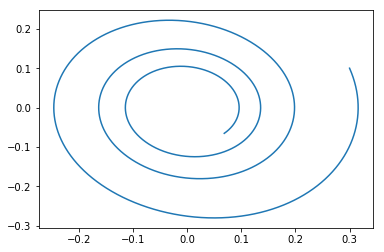

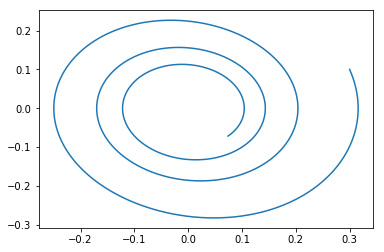

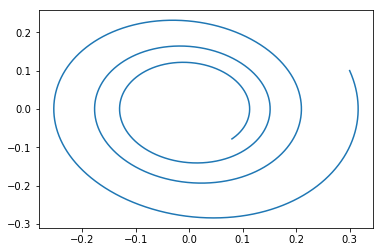

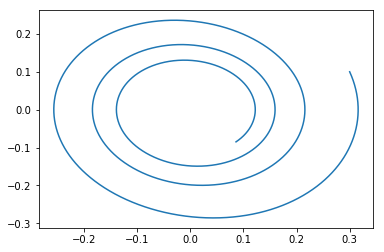

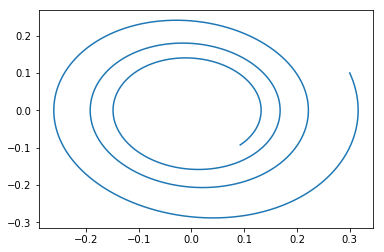

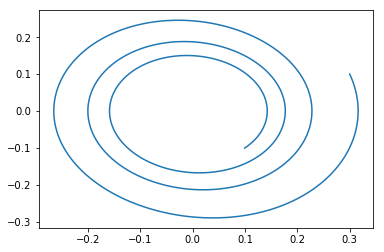

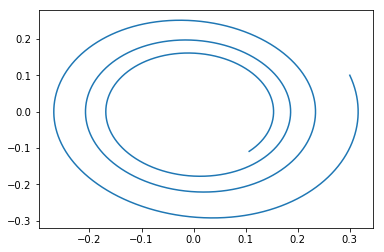

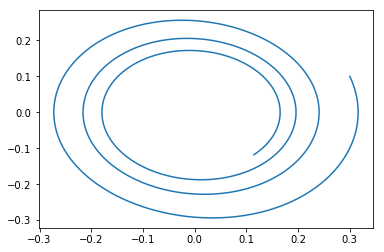

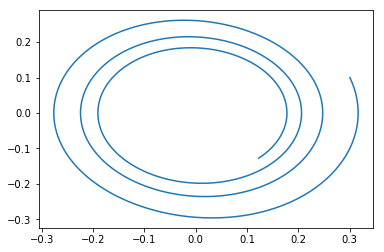

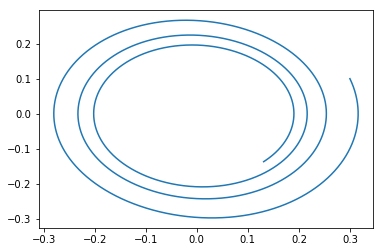

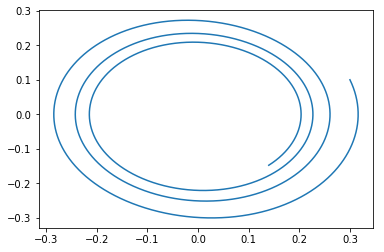

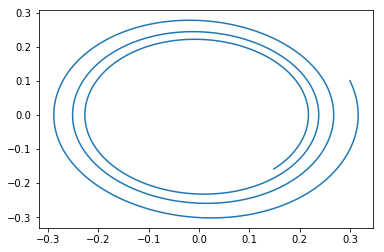

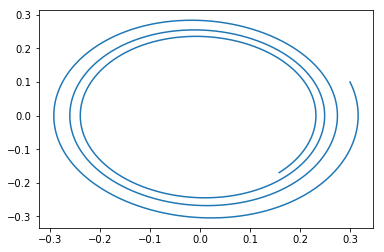

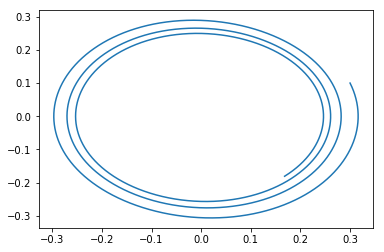

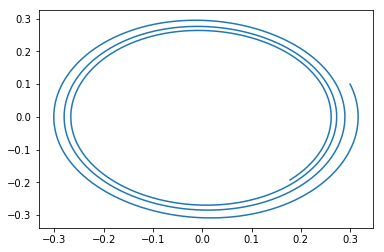

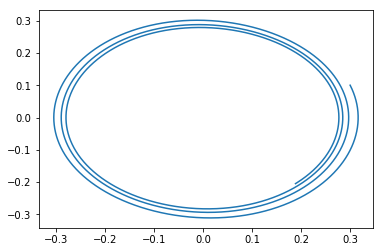

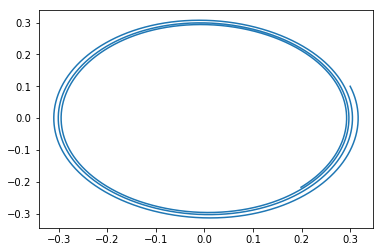

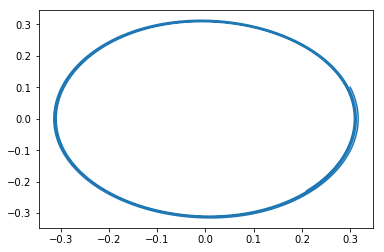

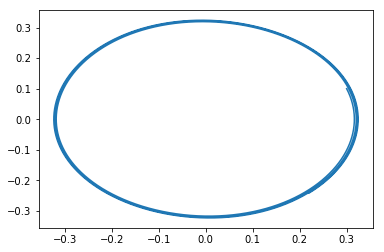

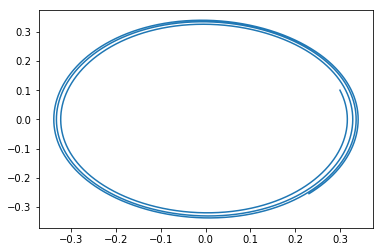

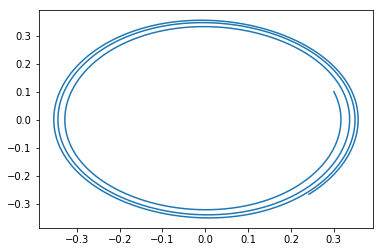

In [45]:
import matplotlib.pyplot as plt
plt.figure()
CI = [0.3, 0.1]
for mu in np.linspace(-0.1,0.1,21):
    hds = hopf_dynamical_system(mu)
    _, phase_coord = hds.solve(1e-4, 20, CI)
    plt.plot([x[0] for x in phase_coord], [x[1] for x in phase_coord])
    plt.show()

# Time Evolution

Let's consider now the time evolution of the system

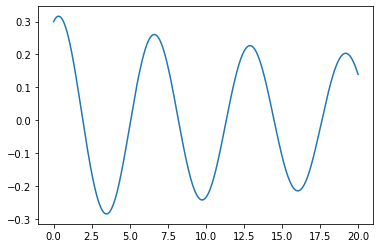

In [4]:
# fix mu=0
mu = 0
CI = [0.3, 0.1]
hds = hopf_dynamical_system(mu)
time, phase_coord = hds.solve(1e-4, 20, CI)
plt.figure()
plt.plot(time, [x[0] for x in phase_coord])
plt.show()

change the CI

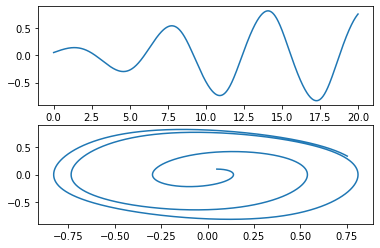

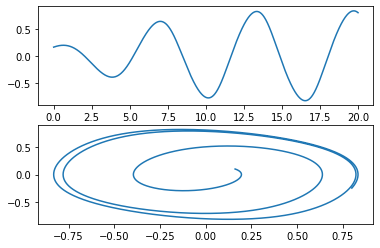

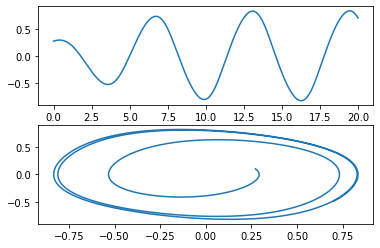

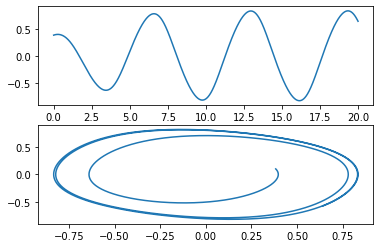

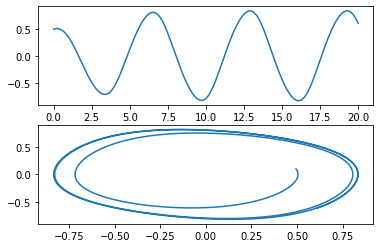

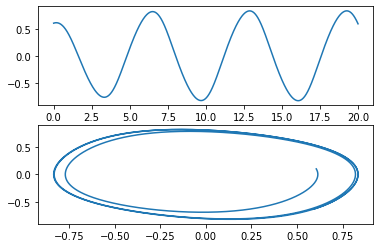

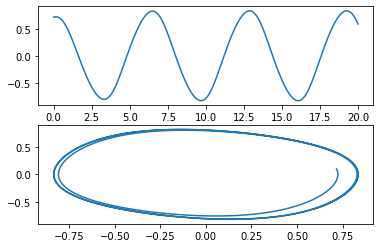

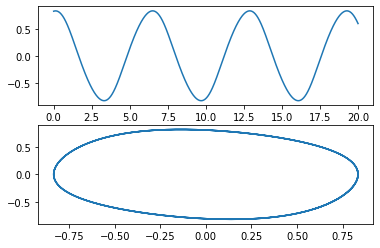

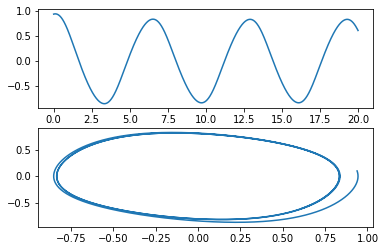

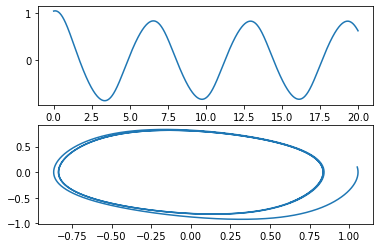

In [9]:
mu = 0.5
for dx in np.linspace(0,1,10):
    CI = [0.05+dx, 0.1]
    hds = hopf_dynamical_system(mu)
    time, phase_coord = hds.solve(1e-4, 20, CI)
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(time, [x[0] for x in phase_coord])
    plt.subplot(2,1,2)
    plt.plot([x[0] for x in phase_coord], [x[1] for x in phase_coord])
plt.show()

# Insert TDA

In [6]:
import giotto as o

In [10]:
from giotto.images import ImageBinarizer, ImageInverter, ImageToPointCloud, HeightFiltration, DilationFiltration, RadialFiltration, ErosionFiltration, SignedDistanceFiltration, DensityFiltration
from giotto.homology import VietorisRipsPersistence, CubicalPersistence
from giotto.diagram import DiagramDistance, DiagramAmplitude, DiagramScaler, PersistentEntropy
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion, make_union
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.base import clone

In [11]:
rips_complex = VietorisRipsPersistence(metric='euclidean', max_edge_length=100, 
                                       homology_dimensions=[0, 1])

In [25]:
# vectorize the phase_coord vector
phase_coord = np.array(phase_coord)
phase_coord = np.expand_dims(phase_coord, axis=2)

In [26]:
rips_complex.fit(phase_coord)

VietorisRipsPersistence(homology_dimensions=[0, 1], max_edge_length=100,
                        metric='euclidean', n_jobs=None)

In [27]:
X_train_rips = rips_complex.transform(phase_coord)

In [51]:
def plot_diagram(X):
    """X should be a dictionary containing the homology dimesions as key, i.e. 0,1,2"""
    colors_dict = {0: 'r', 1: 'b', 2: 'y'}
    plt.figure()
    for key in X.keys():
        plt.plot(X[key].squeeze(1)[:,0], X[key].squeeze(1)[:,1], 'o', color=colors_dict[key])
        
    plt.plot([0, 1.5], [0, 1.5], color='k')
    plt.show()

In [49]:
X_train_rips[0].shape

(200000, 1, 2)

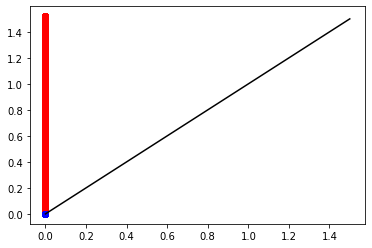

In [52]:
plot_diagram(X_train_rips)